<a href="https://colab.research.google.com/github/priyadarshighosh/Feature_Engineering/blob/main/DAY05%20Handling%20Mixed%20Values/FE_handling_mixed_values_DAY05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HANDLING MIXED VALUES IN COLUMNS

IMPORTING DATA SCIENCE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


IMPORTING MACHINE LEARNING LIBRARIES AND CLASSES

In [ ]:

from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling


from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score


In [ ]:
from google.colab import files    # we are importing the file from the device
uploaded = files.upload()

# OUR MODIFIED DATASET

In [ ]:
df=pd.read_csv('Titanic-Modified-Dataset.csv')   #fitting the data in the df dataframe
df.head()

Cabin - Cabin no if any
Ticket contains the compartment name and the number
Survived is normal yes or no
Number - signifies how many people are with the person .... A means ALONE

In [ ]:
df['number'].unique()      #this gives the unique numbers in the column

# EXTRACTION AND JOINING OF COLUMNS

---

# FOR SURVIVED



In [ ]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passenger travelling with ')

extracting the numerical path

In [ ]:
df['number_numerical'] = pd.to_numeric(df['number'], errors='coerce', downcast='integer')

extract the categorical data

In [ ]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(), df['number'], np.nan)

df.head()

#  EXTRACTION AND JOINING OF COLUMNS

---

# FOR CABIN


In [ ]:
df['Cabin'].unique()

Graph cannot be plotted as there are too many unique values for Cabin and Ticket

In [ ]:
df['Cabin-num'] = df['Cabin'].str.extract('(\d+)') #extracting the numerical part
df['Cabin-cat'] = df['Cabin'].str[0]            #extracting the first letter

df.head()

In [ ]:
df['Cabin-cat'].value_counts().plot.bar()

#  EXTRACTION AND JOINING OF COLUMNS

---

# FOR TICKET

In [ ]:
df['Ticket'].unique()

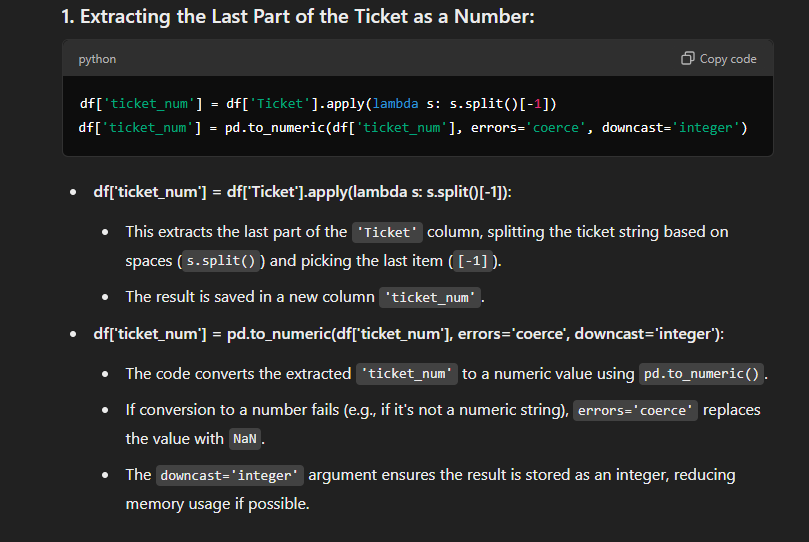

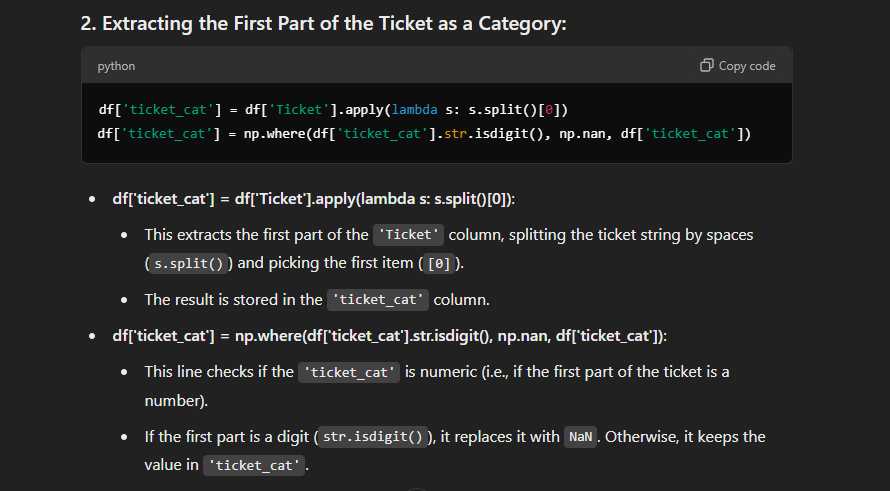

In [ ]:
#extracting the umerical  part of the ticket
df['Ticket-num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket-num'] = pd.to_numeric(df['Ticket-num'], errors='coerce', downcast='integer')


#extracting the categorical part of the ticket
df['Ticket-cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['Ticket-cat'] = np.where(df['Ticket-cat'].str.isdigit(), np.nan , df['Ticket-cat'])


df.head(20)

We sucessfully classfied 3 types of MIXED VALUES